In [1]:
#pip install yellowbrick

In [2]:
################################
# Unsupervised Learning
################################

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
################################
# K-Means
################################

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [7]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [8]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
print("Number of Cluster: ", kmeans.n_clusters)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)
print("Inertia: ", kmeans.inertia_)

Number of Cluster:  4
Cluster Centers:  [[0.1686747  0.11485774 0.34028683 0.12601868]
 [0.6124498  0.75       0.75423729 0.67980189]
 [0.30439405 0.32937147 0.70588235 0.31098951]
 [0.79141566 0.6802226  0.36864407 0.36466408]]
Labels:  [3 1 1 3 1 1 2 2 1 3 2 0 1 2 0 2 0 3 0 1 2 1 0 3 2 0 0 1 0 2 1 1 3 0 2 2 2
 2 2 3 0 3 1 2 0 2 2 0 0 2]
Inertia:  3.683456153585913


In [10]:
################################
# Optimum Küme Sayısının Belirlenmesi
################################

kmeans = KMeans()
ssd = []
K = range(1, 30)

In [11]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

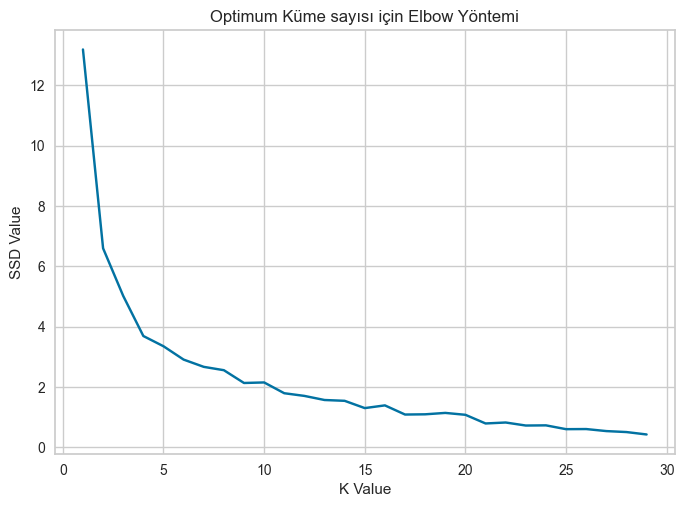

In [12]:
#Düzleşmeye başladğı yer optimum noktadır
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.xlabel("K Value")
plt.ylabel("SSD Value")
plt.show()

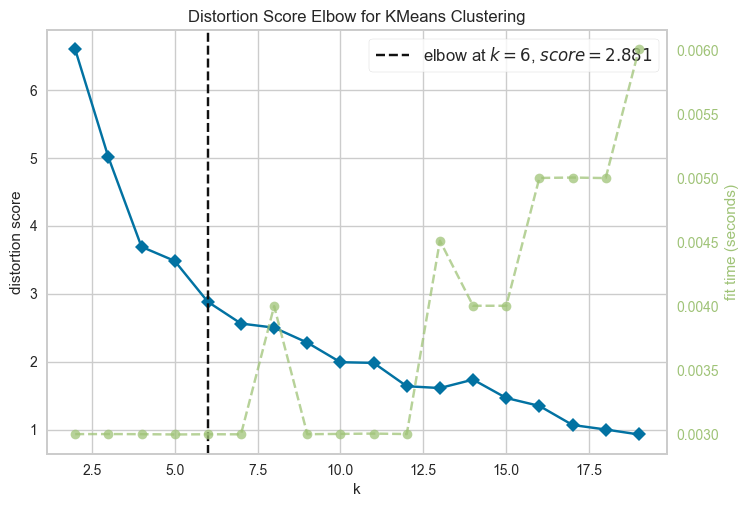

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [14]:
elbow.elbow_value_

6

In [15]:
################################
# Final Cluster'ların Oluşturulması
################################

kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

print("Number of Clusters: ", kmeans.n_clusters)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)

Number of Clusters:  6
Cluster Centers:  [[0.60374833 0.78348554 0.71751412 0.75222509]
 [0.25301205 0.29474886 0.72542373 0.28440999]
 [0.42369478 0.32420091 0.42655367 0.28294574]
 [0.72289157 0.60188356 0.64830508 0.45704134]
 [0.8253012  0.84474886 0.23163842 0.29112834]
 [0.11311914 0.08523592 0.29378531 0.08182601]]
Labels:  [3 0 0 2 0 0 1 1 0 3 1 5 3 2 5 1 2 3 5 0 1 0 1 4 3 2 1 0 5 1 0 3 4 5 1 1 1
 1 1 4 5 3 3 1 5 2 1 5 5 2]


In [16]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [17]:
clusters_kmeans = kmeans.labels_

In [18]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df["cluster"] = clusters_kmeans

In [19]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [20]:
df["cluster"] = df["cluster"] + 1

df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Mississippi,16.1,259,44,17.1,5
North Carolina,13.0,337,45,16.1,5
South Carolina,14.4,279,48,22.5,5


In [21]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            9  10.822222  11.30       9  273.777778  276.0        9   
2           15   5.000000   4.90      15  131.066667  120.0       15   
3            6   7.833333   7.85       6  139.666667  134.5        6   
4            8  12.800000  12.95       8  220.750000  223.5        8   
5            3  14.500000  14.40       3  291.666667  279.0        3   
6            9   2.677778   2.20       9   69.888889   57.0        9   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        74.333333   78.0     9  36.411111  35.10  
2        74.800000   73.0    15  18.306667  18.00  
3        57.166667   56.5     6  18.250000  17.95  
4        70.250000   68.0     8  24.987500  25.65  
5        45.666667   45.0     3  18.566667  17.10  
6        49.333333   51.0     9  10.466667  10.80

In [22]:
df.to_csv("clusters.csv")

In [23]:
################################
# Hierarchical Clustering
################################

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

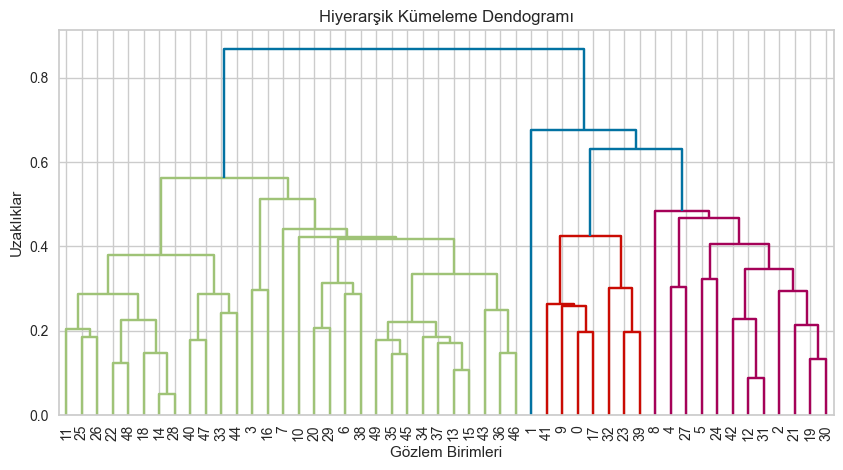

In [24]:
hc_average = linkage(df, "average")

plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

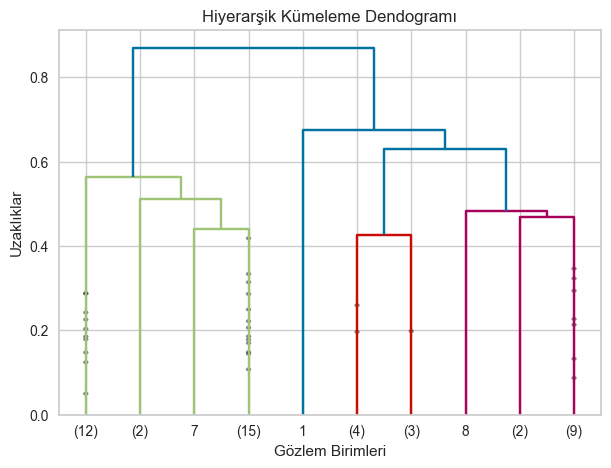

In [25]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

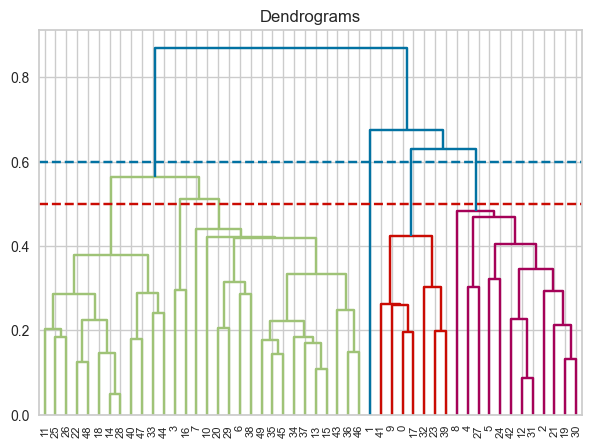

In [26]:
################################
# Kume Sayısını Belirlemek
################################


plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

In [27]:
################################
# Final Modeli Oluşturmak
################################

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

In [28]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [30]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

df["kmeans_cluster_no"] = clusters_kmeans

df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [31]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,5,4
Alaska,10.0,263,48,44.5,4,1
Arizona,8.1,294,80,31.0,3,1
Arkansas,8.8,190,50,19.5,2,3
California,9.0,276,91,40.6,3,1


In [32]:
################################
# Principal Component Analysis
################################

df = pd.read_csv("datasets/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [33]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [34]:
df = df[num_cols]
df.dropna(inplace=True)
df.shape

(322, 16)

In [35]:
df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

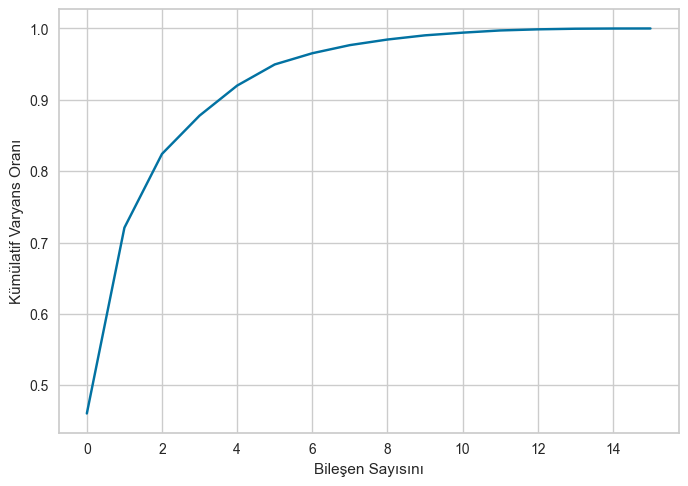

In [37]:
################################
# Optimum Bileşen Sayısı
################################

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [38]:
################################
# Final PCA'in Oluşturulması
################################

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [39]:
################################
# BONUS: Principal Component Regression
################################

df = pd.read_csv("datasets/Hitters.csv")
df.shape

(322, 20)

In [40]:
len(pca_fit)

322

In [41]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

16

In [42]:
others = [col for col in df.columns if col not in num_cols]

In [43]:
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,0.253173,0.776066
1,0.245488,-1.302951,0.118040
2,0.603883,2.617002,-0.698183
3,3.591276,-0.547821,-1.049022
4,-2.264528,0.698898,-1.290536


In [44]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [45]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,0.253173,0.776066,A,E,NaN,A
1,0.245488,-1.302951,0.118040,N,W,475.0,N
2,0.603883,2.617002,-0.698183,A,W,480.0,A
3,3.591276,-0.547821,-1.049022,N,E,500.0,N
4,-2.264528,0.698898,-1.290536,N,E,91.5,N


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [46]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

final_df.dropna(inplace=True)

In [49]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
print(rmse)

345.6021106351967


In [50]:
y.mean()

535.9258821292775

In [51]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

394.6430945766691

In [52]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

Fitting 5 folds for each of 180 candidates, totalling 900 fits


330.1964109339104

In [53]:
################################
# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme
################################

################################
# Breast Cancer
################################

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("datasets/breast_cancer.csv")

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [55]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


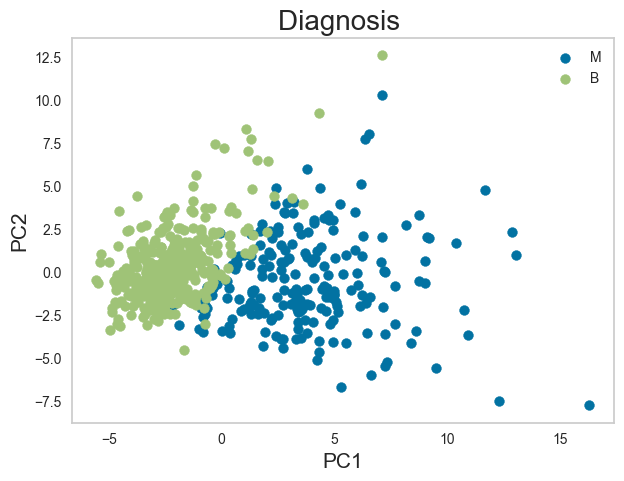

In [56]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

In [57]:
################################
# Iris
################################

import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)
pca_df

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


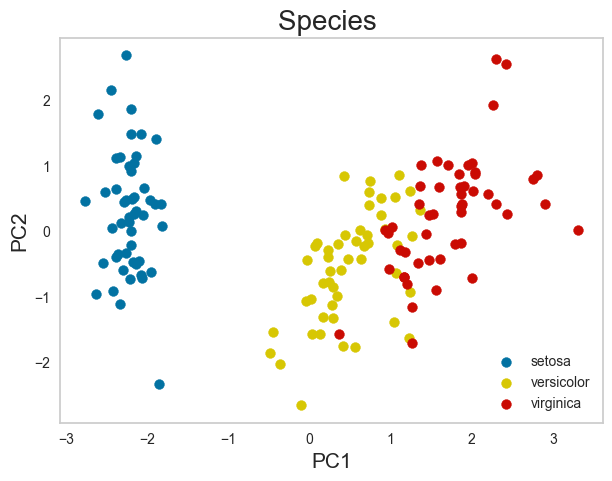

In [58]:
plot_pca(pca_df, "species")

In [59]:
################################
# Diabetes
################################

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

pca_df

,PC1,PC2,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


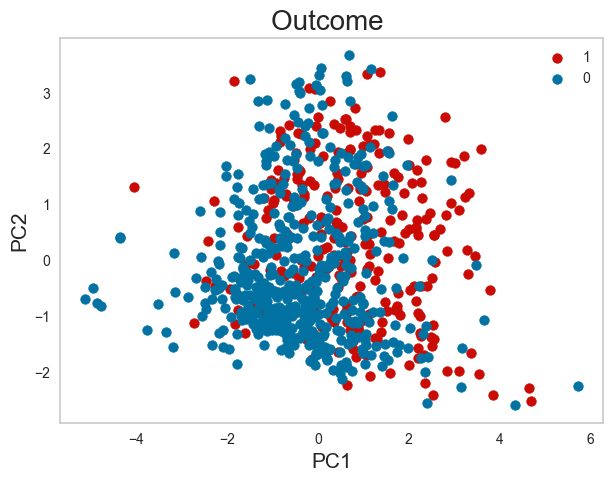

In [60]:
plot_pca(pca_df, "Outcome")